In [1]:
library(fda)

Caricamento del pacchetto richiesto: splines

Caricamento del pacchetto richiesto: fds

Caricamento del pacchetto richiesto: rainbow

Caricamento del pacchetto richiesto: MASS

Caricamento del pacchetto richiesto: pcaPP

Caricamento del pacchetto richiesto: RCurl

Caricamento del pacchetto richiesto: deSolve


Caricamento pacchetto: 'fda'


Il seguente oggetto è mascherato da 'package:graphics':

    matplot




In [2]:
# add path to .libPaths()
.libPaths(c("C:/Users/User/AppData/Local/R/cache/R/renv/library/functional-data-regression-mip-e3349204/R-4.3/x86_64-w64-mingw32", .libPaths()))

In [3]:
.libPaths()

[1] "C:/Users/User/AppData/Local/R/cache/R/renv/library/functional-data-regression-mip-e3349204/R-4.3/x86_64-w64-mingw32"
[2] "C:/Users/User/anaconda3/envs/R-env/Lib/R/library"

In [13]:

measurements <- 50
predictors <- 6
# Define time domains for each ui function as specified in the paper
time_domains <- list(
  seq(0, 1, length.out = measurements),
  seq(0, pi / 3, length.out = measurements), 
  seq(-1, 1, length.out = measurements), 
  seq(0, pi / 3, length.out = measurements), 
  seq(-2, 1, length.out = measurements), 
  seq(-1, 1, length.out = measurements) 
)

# Create the random variables needed for the ui functions as per the paper's description
random_vars <- list(
  a1 = rnorm(1, mean = -4,  sd = sqrt(3 ^ 2)),
  a2 = rnorm(1, mean = 7, sd = sqrt(1.5 ^ 2)),
  b1 = runif(1, min = 3, max = 7),
  b2 = rnorm(1, mean = 0, sd = 1),
  c1 = rnorm(1, mean = -3, sd = sqrt(1.2^2)), 
  c2 = rnorm(1, mean = 2, sd = sqrt(0.5^2)), 
  c3 = rnorm(1, mean = -2, sd = 1), 
  d1 = rnorm(1, mean = -2, sd = 1),
  d2 = rnorm(1, mean = 3, sd = sqrt(1.5^2)),
  e1 = runif(1, min = 2, max = 7),
  e2 = rnorm(1, mean = 2, sd = sqrt(0.4^2)), 
  f1 = rnorm(1, mean = 4, sd = sqrt(2^2)), 
  f2 = rnorm(1, mean = -3, sd = sqrt(0.5^2)), 
  f3 = rnorm(1, mean = 1, sd = 1)
)
u_funcs = list(
  function(t) cos(2 * pi * (t - random_vars$a1)) + random_vars$a2,
  function(t) random_vars$b1 * sin(pi * t) + random_vars$b2,
  function(t) random_vars$c1 * t^3 + random_vars$c2 * t^2 + random_vars$c3 * t,
  function(t) sin(2 * (t - random_vars$d1)) + random_vars$d2 * t,
  function(t) random_vars$e1 * cos(2 * t) + random_vars$e2 * t,
  function(t) random_vars$f1 * exp(-t / 3) + random_vars$f2 * t + random_vars$f3
)

c = 0 # 0.4 or 0.8
beta_funcs = list(
  function(t) {
    sin(t)
  },
  function(t) {
    sin(2 * t)
  },
  function(t) {
    -c * t^2
  },
  function(t) {
    sin(2 * t)
  },
  function(t) {
    c * sin(pi * t)
  },
  function(t) {
    0 *t # This function always returns 0 regardless of the input t
  }
)
# Assuming you've defined all other necessary variables and functions
# Now you can run the simulation
set.seed(10)  # for reproducibility
c <- 0  # This should be changed as per the different scenarios you are testing (0, 0.4, or 0.8)
observations <- 100  # Or whatever your number of observations needs to be
predictors <- length(time_domains)  # Based on the number of time domains you have defined



# Placeholder for the final responses
Y <- numeric(observations)


# Initialize the matrices and vectors
FX <- array(NA, dim = c(observations, predictors, measurements))
GU <- matrix(NA, nrow = observations, ncol = predictors)
RY <- numeric(observations)
Epsilon <- matrix(NA, nrow = observations, ncol = 1)
Y <- numeric(observations)


# Fill FX with functional covariate data and calculate RY and Epsilon
for (i in 1:observations) {
  for (m in 1:predictors) {
    time_domain <- time_domains[[m]]
    u_values <- u_funcs[[m]](time_domain)
    RY[i] <- max(u_values) - min(u_values)  # Calculate range for each observation and predictor
    Epsilon[i, ] <- rnorm(1, mean = 0, sd = sqrt(0.025 * RY[i])^2)  # Generate the error term
    FX[i, m, ] <- u_values + Epsilon[i, ]  # Add the error term to the functional covariate

  }
}

# Compute GU by integrating FX * Beta over time_domain
for (i in 1:observations) {
  for (m in 1:predictors) {
    time_domain <- time_domains[[m]]
    beta_func <- beta_funcs[[m]]
    integrand <- function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
    GU[i, m] <- integrate(integrand, min(time_domain), max(time_domain))$value
  }
}

# Compute RY and the final response Y
for (i in 1:observations) {
  Ryi <- max(GU[i, ]) - min(GU[i, ])
  RY[i] <- Ryi
  Epsilon[i, ] <- rnorm(1, mean = 0, sd = sqrt((0.05 * Ryi)^2))
  Y[i] <- sum(GU[i, ]) + Epsilon[i, ]
}



function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i, m, ])(t) * beta_func(t)
<bytecode: 0x00000230c4a46a30>
function(t) splinefun(time_domain, FX[i,

In [3]:
Y[1:3]

[1] 7.741935 7.842478 7.800984

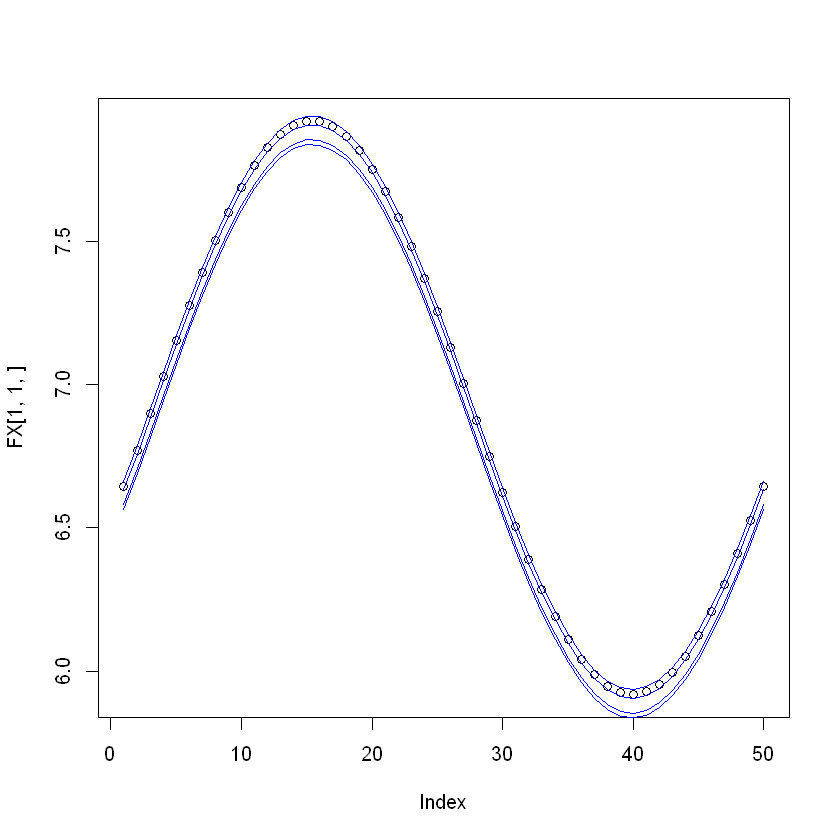

In [9]:
#plot FX[1,1,] # this is the first observation of the first predictor
plot(FX[1,1,])
# plot also the 3rd and 5th observation of the first predictor 
lines(FX[5,1,], type="l", col="blue")
lines(FX[3,1,], type="l", col="blue")
lines(FX[7,1,], type="l", col="blue")
lines(FX[17,1,], type="l", col="blue")

In [6]:
(GU[1,])

[1] 2.833590 2.701629 0.000000 2.334507 0.000000 0.000000

In [10]:
library(here)
source(here("src", "R", "data_simulator", "config.R")) # sets the utility paths


Warning message:
"il pacchetto 'here' è stato creato con R versione 4.3.2"
here() starts at C:/Users/User/Documents/repos/TESI/tesi_data/progetto_s_on_f.md/b_spline/functional-data-regression-mip



In [11]:
library(refund)
library(MASS)
library(fda)

Warning message:
"il pacchetto 'refund' è stato creato con R versione 4.3.2"


In [67]:
basis_functions= 5
norder = 4
# Initialize a list to store basis objects
basis_objs <- vector("list", length = predictors)

# Loop over each functional predictor
for (m in 1:predictors) {
  # Use the specific time domain for each functional predictor to create the basis object
  bm_range <- time_domains[[m]]
  basis_objs[[m]] <- fda::create.bspline.basis(rangeval = c(min(bm_range), max(bm_range)), nbasis = basis_functions, norder = norder)
}


In [173]:
# Smooth beta coefficients into the B-spline basis
smooth_beta_function <- function(beta_funcs,num_basis, time_domains, basis_objs) {
  num_predictors <- length(beta_funcs)
  
  # Initialize a matrix to store the smoothed beta coefficients
  beta_matrix <-  array(0, dim = c(num_predictors,num_basis))

  for (i in 1:num_predictors) {
    beta_func <- beta_funcs[[i]]
    basis_obj <- basis_objs[[i]]
    
    beta_values <- beta_func(time_domains[[i]])
    fdPar_obj <- fda::fdPar(basis_obj)
    smoothed_beta <- fda::smooth.basis(time_domains[[i]], beta_values, fdPar_obj)
    beta_matrix[i,] <- smoothed_beta$fd$coefs
  }
  return(beta_matrix)
}

# Smooth beta coefficients into the B-spline basis
Beta_matrix <- smooth_beta_function(beta_funcs, basis_functions, time_domains, basis_objs)


In [172]:
# Compute the J matrix (inner products for basis functions)
compute_J_matrix <- function(basis_objs,num_predictors,num_basis){
    # Initialize the J matrix
    J <-  array(0, dim = c(num_predictors,num_basis,num_basis))

    # Loop over each functional predictor
    for (m in 1:num_predictors) {
        # insert the inner products into the J matrix
        inner <- fda::inprod(basis_objs[[m]], basis_objs[[m]])
        # insert the inner products into the J matrix for the mth predictor
        J[m,,] <- inner
    }
    # Return the J matrix
    return(J)
}


In [41]:
J <- compute_J_matrix(basis_objs,predictors,basis_functions)


In [42]:
expand_functional_data <- function(FX,num_basis, time_domains, basis_obj_list) {
  num_predictors <- dim(FX)[2]
  num_observations <- dim(FX)[1]
  num_basis <- num_basis
  
  # Initialize a 3D array to store the B-spline coefficients
  expanded_data_array <-  array(0, dim = c(num_observations,predictors,num_basis))

  for (i in 1:num_observations) {
    for (j in 1:num_predictors) {
      data_vector <- FX[i, j, ]
      time <- time_domains[[j]]
      basis_obj <- basis_obj_list[[j]]      
      fd_obj <- fda::smooth.basis(time, data_vector, basis_obj)$fd
      expanded_data_array[i,j,] <- fd_obj$coefs
    }
  }
  
  return(expanded_data_array)
}

In [44]:
# Expand functional data into B-spline basis

W <- compute_W_matrix(FX,basis_functions, time_domains = time_domains, basis_obj_list = basis_objs)

In [196]:
#  # Compute Z matrix
# compute_Z_matrix <- function(W_array, J, predictors, basis_functions) {
#   observations <- dim(W_array)[1]
  
#   # Initializing Z_matrix with a column of ones for the intercept
#   Z_matrix <- matrix(0, nrow = observations, ncol = predictors * basis_functions)

#   # Looping through each observation
#   for (i in 1:observations) {
#     # Counter to keep track of the column index in Z_matrix
#     col_index <- 1 
#     for (m in seq_len(predictors)) {
#       for (b in seq_len(basis_functions)) {
#         # Calculating and assigning the transformed predictors to the Z_matrix
#         Z_matrix[i, col_index] <- W_array[i, m, b] * sum(J[m,b, ])
#         col_index <- col_index + 1
#       }
#     }
#   }
#   return(Z_matrix)
# }
 # Compute Z matrix
compute_Z_matrix <- function(W_array, J, predictors, basis_functions) {
  observations <- dim(W_array)[1]
  # if intercept is true, then ncol is predictors * basis_functions + 1
  # else ncol is predictors * basis_functions. create n col variabile
  n_col <- predictors * basis_functions 

  Z_matrix <- matrix(1, nrow = observations, ncol = n_col)

  for (i in 1:observations) {
    for (m in seq_len(predictors)) {
      Z_matrix[i, ] <- W_array[i, m, ] %*% J[m,,]
    }
  }
  return(Z_matrix)
}
 Z_matrix <- compute_Z_matrix(W, J, predictors, basis_functions)

In [199]:
  Z_matrix <- array(Z_matrix, dim = c(observations,predictors,basis_functions))


In [242]:
# Compute Y matrix
compute_Y_values <- function(observations, predictors, basis_functions, B_matrix, beta_0, Z_matrix, all_errors) {
  Y <- numeric(observations)
  for (i in 1:observations) {
    Y[i] <- beta_0  # Adding the intercept first
    for (m in 1:predictors) {
      sum_B_Z <- 0  # Summation of B and Z products for each predictor
      for (j in 1:basis_functions) {
        sum_B_Z <- sum_B_Z + B_matrix[m, j] * Z_matrix[i,m,j]
      }
      Y[i] <- Y[i] + sum_B_Z  # Adding the summation to Y
    }
    Y[i] <- Y[i] + all_errors[i]  # Adding the error term at the end
  }
  return(Y)
}

all_errors <- rnorm(observations, mean = 0, sd = 0) # Generating error terms here
intercept = 0
Y_2 <- compute_Y_values(observations, predictors, basis_functions, Beta_matrix,intercept, Z_matrix, all_errors)

In [230]:
Y_2[2]

[1] 6.985666

In [239]:
apply_noise <- function(Y) {
  observations <- length(Y)
  Y_output <- numeric(observations)
  RY <- numeric(observations)
  Epsilon <- numeric(observations)
  
  Ryi <- max(Y) - min(Y)  # Calculate the range of Y
  
  for (i in 1:observations) {
    RY[i] <- Ryi
    Epsilon[i] <- rnorm(1, mean = 0, sd = sqrt((0.05 * Ryi)^2))
    Y_output[i] <- Y[i] + Epsilon[i]
  }
  
  return(list(Y_output = Y_output, RY = RY))
}

In [215]:
sum(GU[2, ])

[1] 6.660313

In [226]:
for (i in 1:observations){
  cat("Y_2[", i, "]: ", Y_2[i], ", Expression result: ",sum(GU[i, ]), ", - : ", Y_2[i] -sum(GU[i, ]), "\n")
}

Y_2[ 1 ]:  6.864268 , Expression result:  6.686732 , - :  0.1775357 
Y_2[ 2 ]:  6.985666 , Expression result:  6.660313 , - :  0.3253534 
Y_2[ 3 ]:  6.67024 , Expression result:  6.874736 , - :  -0.2044959 
Y_2[ 4 ]:  6.032074 , Expression result:  6.679122 , - :  -0.6470481 
Y_2[ 5 ]:  6.650792 , Expression result:  6.614542 , - :  0.03625027 
Y_2[ 6 ]:  6.258808 , Expression result:  6.711966 , - :  -0.453158 
Y_2[ 7 ]:  6.482034 , Expression result:  6.495277 , - :  -0.01324362 
Y_2[ 8 ]:  6.63506 , Expression result:  6.833873 , - :  -0.1988124 
Y_2[ 9 ]:  7.444074 , Expression result:  6.79361 , - :  0.6504642 
Y_2[ 10 ]:  6.831493 , Expression result:  6.897978 , - :  -0.06648446 
Y_2[ 11 ]:  7.138364 , Expression result:  6.690021 , - :  0.4483429 
Y_2[ 12 ]:  6.260495 , Expression result:  6.620879 , - :  -0.3603832 
Y_2[ 13 ]:  6.592211 , Expression result:  6.78234 , - :  -0.1901287 
Y_2[ 14 ]:  6.97267 , Expression result:  6.900637 , - :  0.07203305 
Y_2[ 15 ]:  6.71044 , E

In [229]:
Y[1]

[1] 6.56862

In [238]:
for (i in 1:observations){
  cat("Y_2[", i, "]: ", Y_2_output[i], ", Expression result: ",Y[i], ", - : ", Y_2_output[i] -Y[i], "\n")
}

Y_2[ 1 ]:  6.864268 , Expression result:  6.56862 , - :  0.295648 
Y_2[ 2 ]:  6.985666 , Expression result:  6.653221 , - :  0.3324457 
Y_2[ 3 ]:  6.67024 , Expression result:  6.69747 , - :  -0.0272305 
Y_2[ 4 ]:  6.032074 , Expression result:  6.720993 , - :  -0.6889196 
Y_2[ 5 ]:  6.650792 , Expression result:  6.795252 , - :  -0.1444597 
Y_2[ 6 ]:  6.258808 , Expression result:  6.555962 , - :  -0.2971543 
Y_2[ 7 ]:  6.482034 , Expression result:  6.468465 , - :  0.01356907 
Y_2[ 8 ]:  6.63506 , Expression result:  6.632091 , - :  0.002968719 
Y_2[ 9 ]:  7.444074 , Expression result:  6.861034 , - :  0.5830404 
Y_2[ 10 ]:  6.831493 , Expression result:  6.842896 , - :  -0.01140336 
Y_2[ 11 ]:  7.138364 , Expression result:  6.468636 , - :  0.6697277 
Y_2[ 12 ]:  6.260495 , Expression result:  6.948091 , - :  -0.687596 
Y_2[ 13 ]:  6.592211 , Expression result:  6.846946 , - :  -0.2547353 
Y_2[ 14 ]:  6.97267 , Expression result:  6.813223 , - :  0.1594471 
Y_2[ 15 ]:  6.71044 , Exp